<a href="https://colab.research.google.com/github/Tahsinnazar/Final-project-aic./blob/main/sat_imag_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Satellite Image Classification using Deep Learning**  

1. Overview  
Satellite image classification is a crucial application of deep learning in remote sensing and geospatial analysis. With the increasing availability of high-resolution satellite images, machine learning and deep learning models are being leveraged to analyze, categorize, and interpret these images for various applications, such as land cover classification, environmental monitoring, urban planning, and disaster management.

This project focuses on classifying satellite images using Convolutional Neural Networks (CNNs), a powerful deep learning technique designed to process and analyze image data. CNNs excel at detecting spatial features such as shapes, textures, and patterns, making them well-suited for satellite image classification tasks.

2. Objective of the Project   
The primary goal of this project is to develop an automated satellite image classification system using deep learning techniques. The model is trained on a labeled dataset of satellite images, learning to differentiate between various categories based on their visual characteristics. The project aims to:

✅ Preprocess and augment satellite images to improve model generalization.


✅ Develop and train a CNN-based model for accurate classification.

✅ Evaluate model performance using key metrics such as accuracy and loss.

✅ Make predictions on new satellite images to test real-world applicability.

I train this for my MARS Exploration project . which can be used in future.

tehseenpasha81@gmail.com


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Dataset Parameters
path = "/content/drive/MyDrive/s\image\data/data"
batch_size = 32
height, width = 128, 128
epochs = 20
seed = 1234

This code snippet is responsible for loading and preprocessing a satellite image of earth insted of mars dataset for a deep learning project.

Dataset Path: The dataset is located at /content/drive/MyDrive/s\image\data/data . The path can be adjusted if required.(download
dataset by my drive.)

Data Transformations:

The images are resized to 128x128 pixels for uniformity.
The resized images are converted to tensors using ToTensor(), which scales pixel values to the range [0, 1].
Normalization is applied with a mean and standard deviation of 0.5, ensuring pixel values are scaled to the range [-1, 1].
Loading the Dataset:
The dataset is loaded using PyTorch’s ImageFolder class, which organizes images based on their subfolder structure. The applied transformations ensure the images are ready for input into a deep learning model.

Output:

The total number of images are 5678.


In [ ]:
# Documentation of Models and Preprocessing Techniques
models_applied = []
data_preprocessing = "Rescaling pixel values (0-255) to the range 0-1"
loss_function = "Sparse Categorical Crossentropy"
optimizer = "Adam"
evaluation_parameters = ["Accuracy"]

SPLITTING DATASET ,TRAIN AND Testing .

In [ ]:
# Load Dataset
train = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(height, width),
    batch_size=batch_size
)
val = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(height, width),
    batch_size=batch_size
)
class_names = train.class_names
num_classes = len(class_names)

Found 5127 files belonging to 4 classes.
Using 4102 files for training.
Found 5127 files belonging to 4 classes.
Using 1025 files for validation.


This section of the code performs dataset splitting and batch loading to prepare the data for training, validation, and testing.

Dataset Splitting:

The dataset is divided into three parts:
70% for training to train the deep learning model.
15% for validation to tune hyperparameters and monitor overfitting during training.
15% for testing to evaluate model performance on unseen data.
The split sizes are computed dynamically based on the total number of images.
Random Split:

random_split is used to create the three subsets (train_dataset, val_dataset, and test_dataset) while maintaining randomness in the split.
Data Loaders:

Each subset is loaded into a DataLoader with a batch size of 32.
The training loader shuffles the data to improve generalization.
For validation and testing, shuffling is disabled to ensure reproducible results.
Output:

The total number of images in each subset is printed, providing a summary of how the dataset has been divided.

In [ ]:
# Data Augmentation Layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.RandomBrightness(0.2)
])

# Preprocessing Layer
preprocessing_layer = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1.0 / 255),
    tf.keras.layers.Normalization(mean=0.5, variance=0.25)
])


In [ ]:
# Visualize Training and Validation Samples
def visualize_samples(dataset, title):
    plt.figure(figsize=(15, 7))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f"{title}: {class_names[labels[i]]}")
            plt.axis("off")
    plt.tight_layout()
    plt.show()

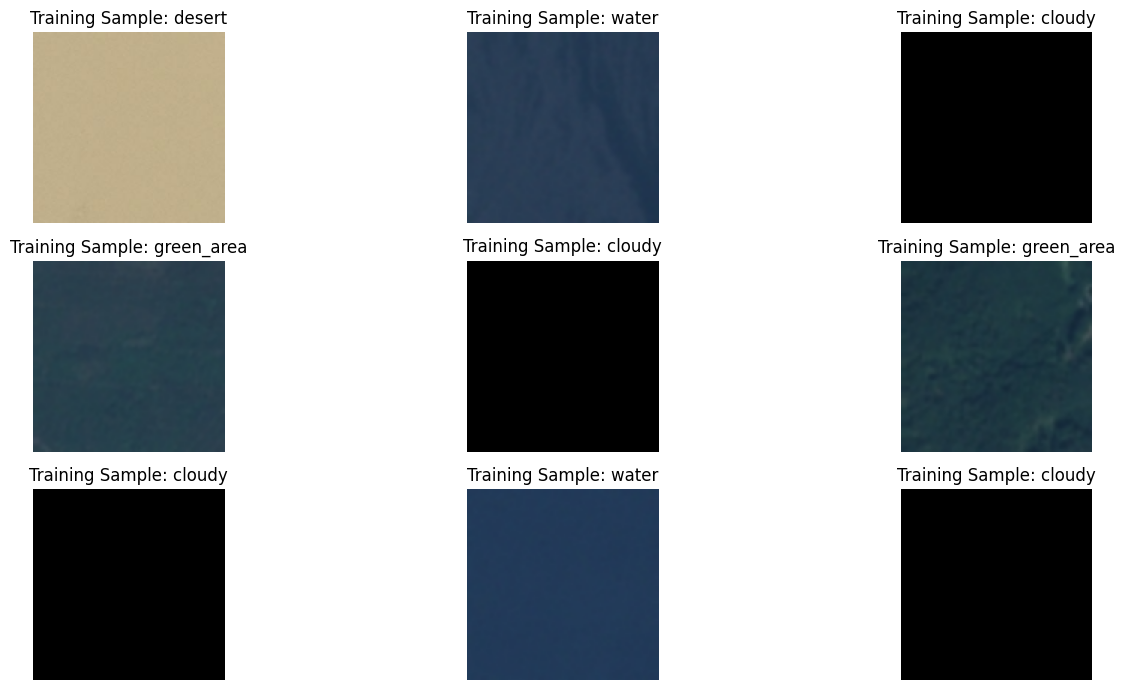

In [ ]:
visualize_samples(train, "Training Sample")

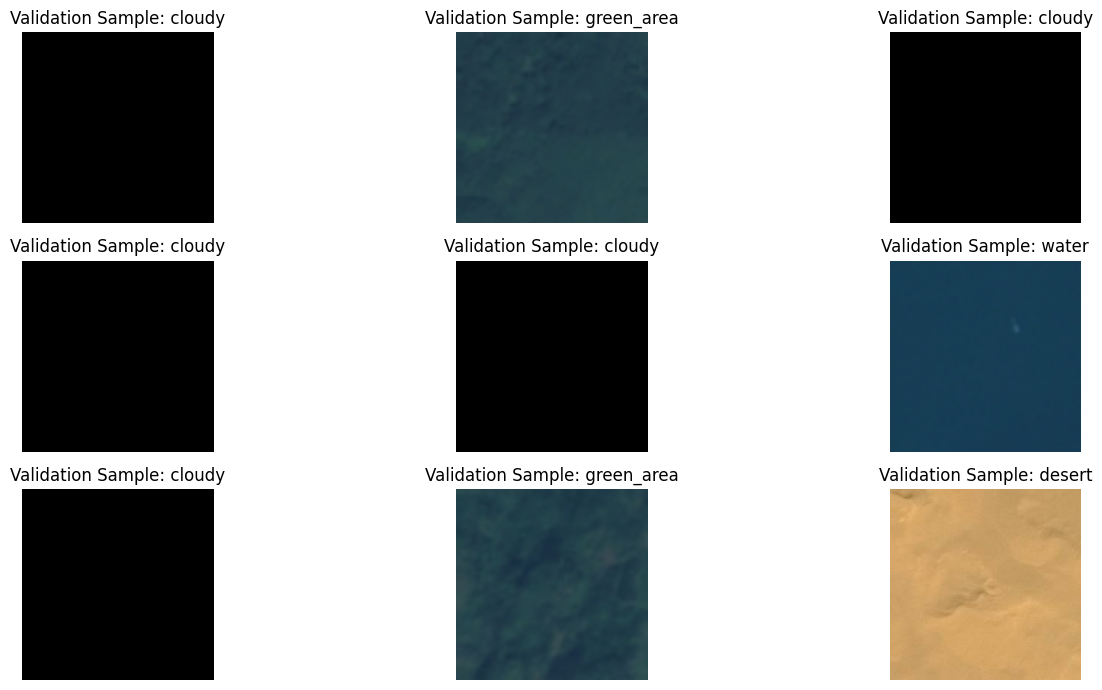

In [ ]:
visualize_samples(val, "Validation Sample")

This part of the code handles visualization of sample images from the training dataset to provide a quick view of the data being used for model training.

Class Labels:
The variable classes stores the class labels of the dataset, which will be used for displaying the image titles.

Function show_images:

This function takes a DataLoader as input and retrieves a batch of images and their corresponding labels.
It uses matplotlib to display 5 randomly selected images from the batch.
The images are un-normalized (scaled back to their original pixel range) using the formula images[i].permute(1, 2, 0) * 0.5 + 0.5.
Each image is displayed with its corresponding class label as the title, and the axes are hidden for better visualization.
Output:

The function is called with train_loader to display sample images from the training set, providing insight into the dataset's appearance and diversity.

In [ ]:
# Custom CNN Model Definition
def build_custom_cnn(num_classes):
    models_applied.append("Custom CNN")
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=(height, width, 3)),
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

# Transfer Learning Models
def create_transfer_model(base_model_name, base_model, num_classes):
    models_applied.append(base_model_name)
    base_model.trainable = False  # Freeze base model layers
    return tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

transfer_models = {
    "MobileNetV2": tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False, input_shape=(height, width, 3)),
    "ResNet50": tf.keras.applications.ResNet50(weights="imagenet", include_top=False, input_shape=(height, width, 3)),
    "InceptionV3": tf.keras.applications.InceptionV3(weights="imagenet", include_top=False, input_shape=(height, width, 3)),
    "EfficientNetB0": tf.keras.applications.EfficientNetB0(weights="imagenet", include_top=False, input_shape=(height, width, 3)),
    "DenseNet121": tf.keras.applications.DenseNet121(weights="imagenet", include_top=False, input_shape=(height, width, 3)),
    "Xception": tf.keras.applications.Xception(weights="imagenet", include_top=False, input_shape=(height, width, 3))
}

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
results = {}

BUILDING THE MODELS' OF ML AND DL.

In [ ]:
def evaluate_model(model_name, model):
    print(f"\nTraining and Evaluating: {model_name}")

    # Compile Model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train Model
    history = model.fit(
        train,
        validation_data=val,
        epochs=epochs,
        verbose=1
    )

    # Evaluate Model
    val_labels = []
    val_predictions = []
    for images, labels in val:
        predictions = model.predict(images)
        val_labels.extend(labels.numpy())
        val_predictions.extend(np.argmax(predictions, axis=1))

    # Metrics
    report = classification_report(val_labels, val_predictions, target_names=class_names, output_dict=True)
    conf_matrix = confusion_matrix(val_labels, val_predictions)

    # Use predicted probabilities for ROC curve, not argmax
    predictions_prob = model.predict(val)  # This gives the probabilities
    fpr, tpr, _ = roc_curve(val_labels, predictions_prob[:, 1], pos_label=1)  # For binary, or adjust for multiclass
    roc_auc = auc(fpr, tpr)

    # Store Results
    results[model_name] = {
        "model": model,
        "history": history.history,
        "classification_report": report,
        "confusion_matrix": conf_matrix
    }

    # Visualization
    def plot_metrics(history, model_name):
        epochs_range = range(len(history['accuracy']))
        accuracy = history['accuracy']
        val_accuracy = history['val_accuracy']
        loss = history['loss']
        val_loss = history['val_loss']

        plt.figure(figsize=(16, 8))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, accuracy, label='Training Accuracy')
        plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title(f'{model_name} - Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title(f'{model_name} - Loss')
        plt.show()

    plot_metrics(history.history, model_name)

    # Confusion Matrix Heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return val_predictions, val_labels


WARNING ⚠ ; RENDER OWN YOUR RISK.   
  it take 32 min to render.


In [ ]:
# Train Custom CNN
cnn_model = build_custom_cnn(num_classes)
evaluate_model("Custom CNN", cnn_model)


In [ ]:
# Train Transfer Learning Models
for name, base_model in transfer_models.items():
    model = create_transfer_model(name, base_model, num_classes)
    evaluate_model(name, model)

In [ ]:
# Compare Models and Final Outputs
def summarize_and_compare_models(results):
    print("\n===== SUMMARY =====")
    for name, data in results.items():
        print(f"\nModel: {name}")
        print(f"Best Validation Accuracy: {max(data['history']['val_accuracy']):.4f}")
        print(f"Classification Report:")
        print(data['classification_report'])

    # Comparison Plot
    model_names = [name for name in results.keys()]
    val_accuracies = [max(data["history"]["val_accuracy"]) for data in results.values()]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=model_names, y=val_accuracies, palette="viridis")

    # Add validation accuracy values on top of bars
    for i, val in enumerate(val_accuracies):
        plt.text(i, val + 0.005, f"{val:.4f}", ha='center', va='bottom', fontsize=10, color='black')

    plt.title("Model Comparison - Validation Accuracy")
    plt.xlabel("Models")
    plt.ylabel("Validation Accuracy")
    plt.ylim(0, 1.05)  # Adjust y-axis for better visibility of labels
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
summarize_and_compare_models(results)